In [1]:
import requests
import networkx
import time
import collections
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from main import *

In [3]:
%matplotlib inline

In [4]:
sns.set(style="white", color_codes=True)

## 1. My network summary

### 1.1. Network source and preprocessing

Source of my network is **VK**

In [4]:
id_to_analyse = 9106204
graph = {}
friend_ids = get_friends_ids(id_to_analyse)

In [5]:
g = get_graph_with_friends_connections(friend_ids)

Now we can write graph to file

In [6]:
networkx.write_gml(g, "network.gml")

In [5]:
g = nx.read_gml('network.gml')

In [6]:
node_degree = nx.degree(g)

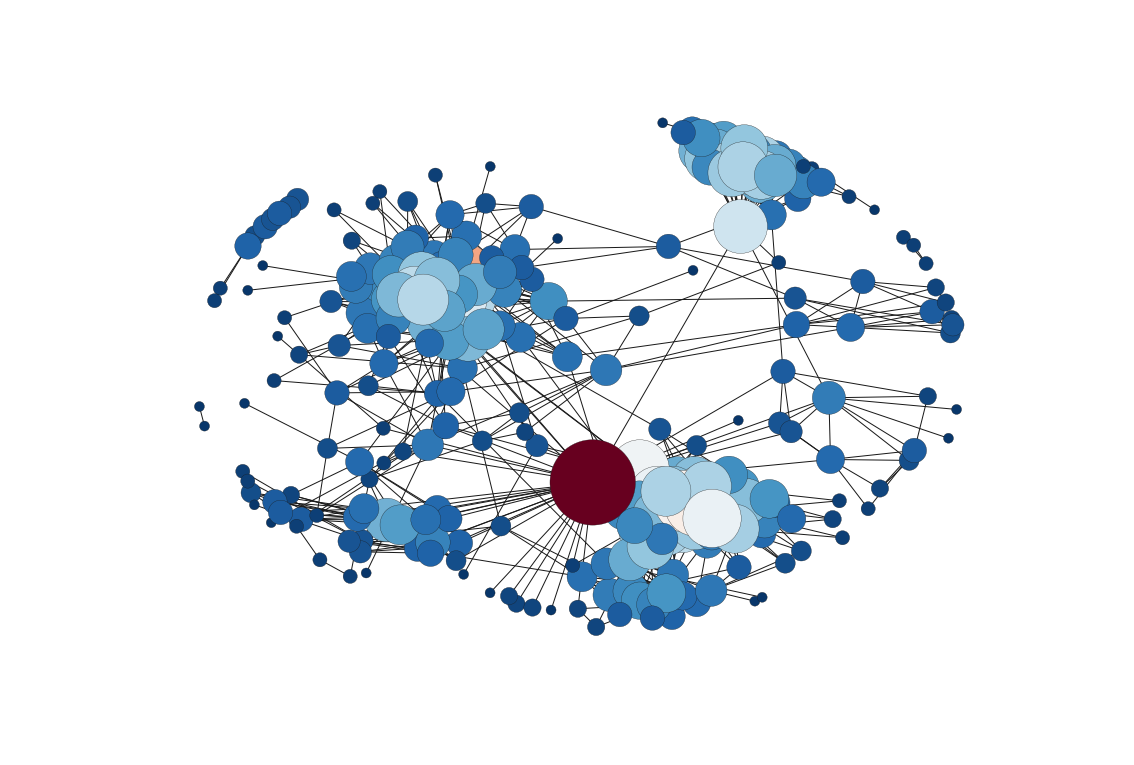

In [8]:
draw_graph(g, node_degree, 100)

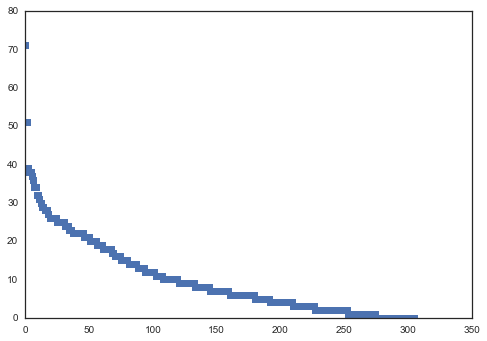

[258, 1, 3, 2, 1, 1, 3, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [83]:
degree_sequence =sorted(nx.degree(g).values(),reverse=True)
plt.plot(degree_sequence,'bs')
plt.show()
graphs = list(nx.connected_component_subgraphs(g))
print([len(g) for g in graphs])
g = graphs[0]

## 2

### 2.1. Compute the degree centrality for nodes.

In [21]:
degree_centrality = networkx.degree_centrality(g)

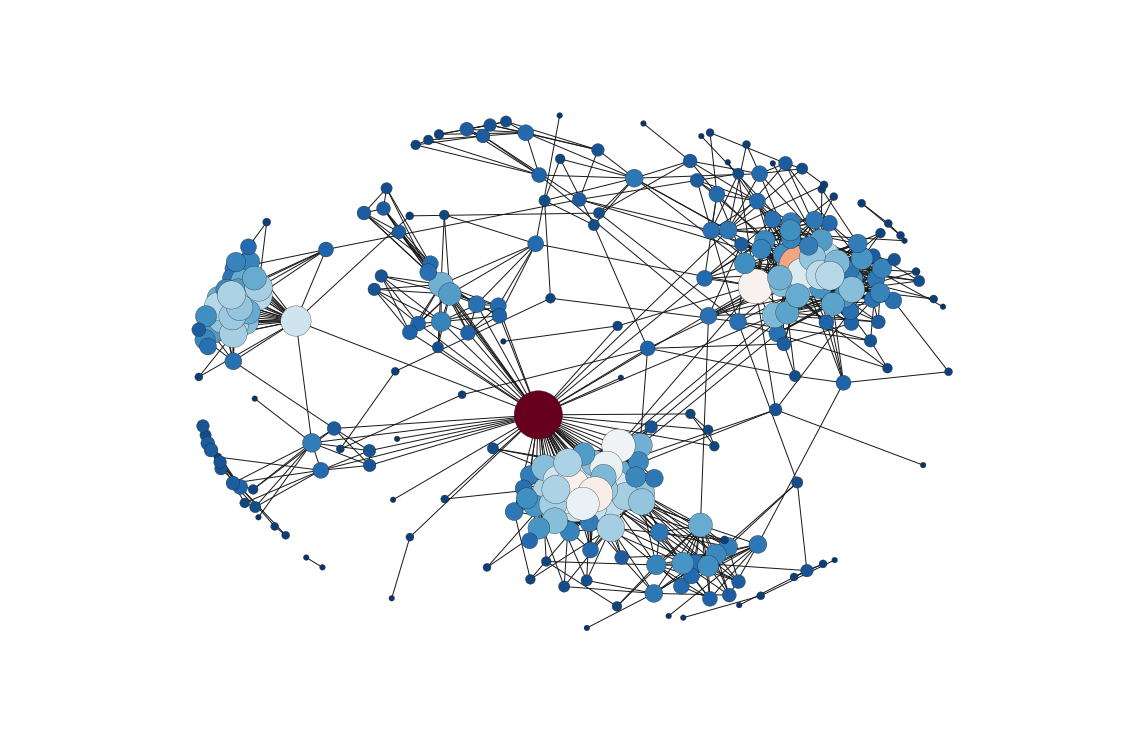

In [26]:
plt.figure(2, figsize=(15,10))
coord = nx.spring_layout(g)
nx.draw(g,
         pos=coord,
         nodelist=degree_centrality.keys(),
         node_size = [d*10000 for d in degree_centrality.values()],
         node_color=degree_centrality.values(),
         font_size=8,
         cmap=plt.cm.get_cmap('RdBu_r'),
         with_labels=False
         )

### 2.1. Compute closeness centrality for nodes.

In [22]:
closeness_centrality = networkx.closeness_centrality(g)

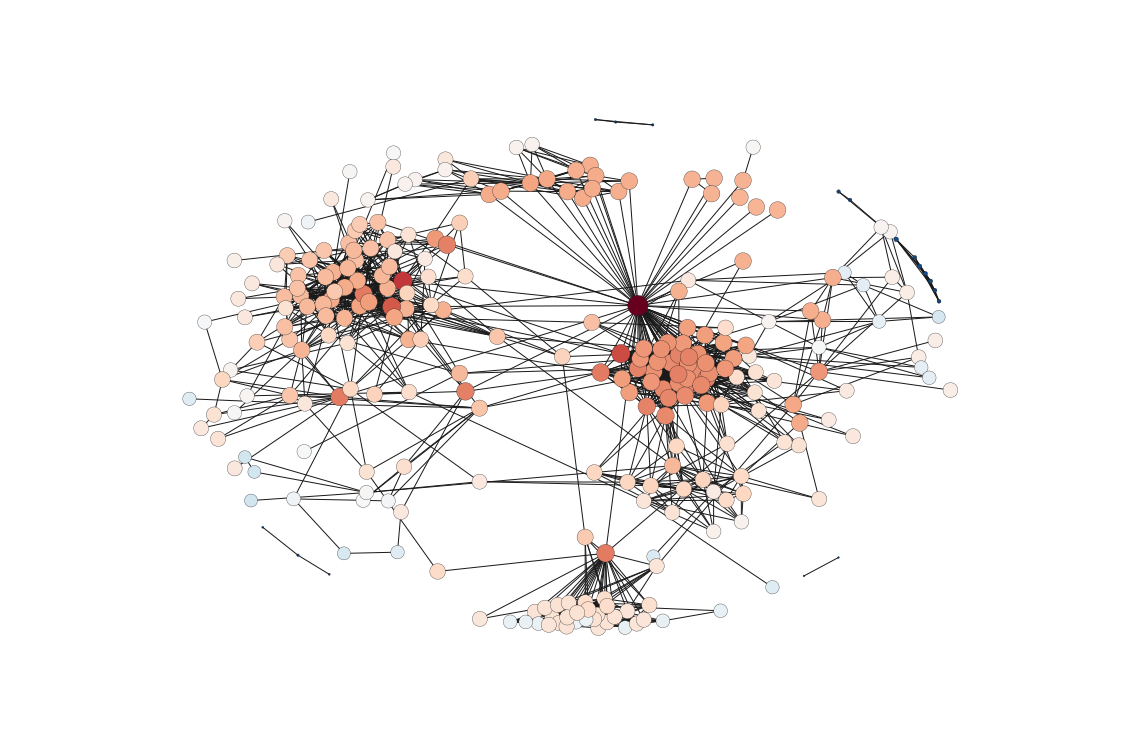

In [29]:
plt.figure(2, figsize=(15,10))
coord = nx.spring_layout(g)
nx.draw(g,
         pos=coord,
         nodelist=closeness_centrality.keys(),
         node_size = [d*1000 for d in closeness_centrality.values()],
         node_color=closeness_centrality.values(),
         font_size=8,
         cmap=plt.cm.get_cmap('RdBu_r'),
         with_labels=False
         )

### 2.1. Compute the shortest-path betweenness centrality for nodes

In [58]:
betweenness_centrality = networkx.betweenness_centrality(g)

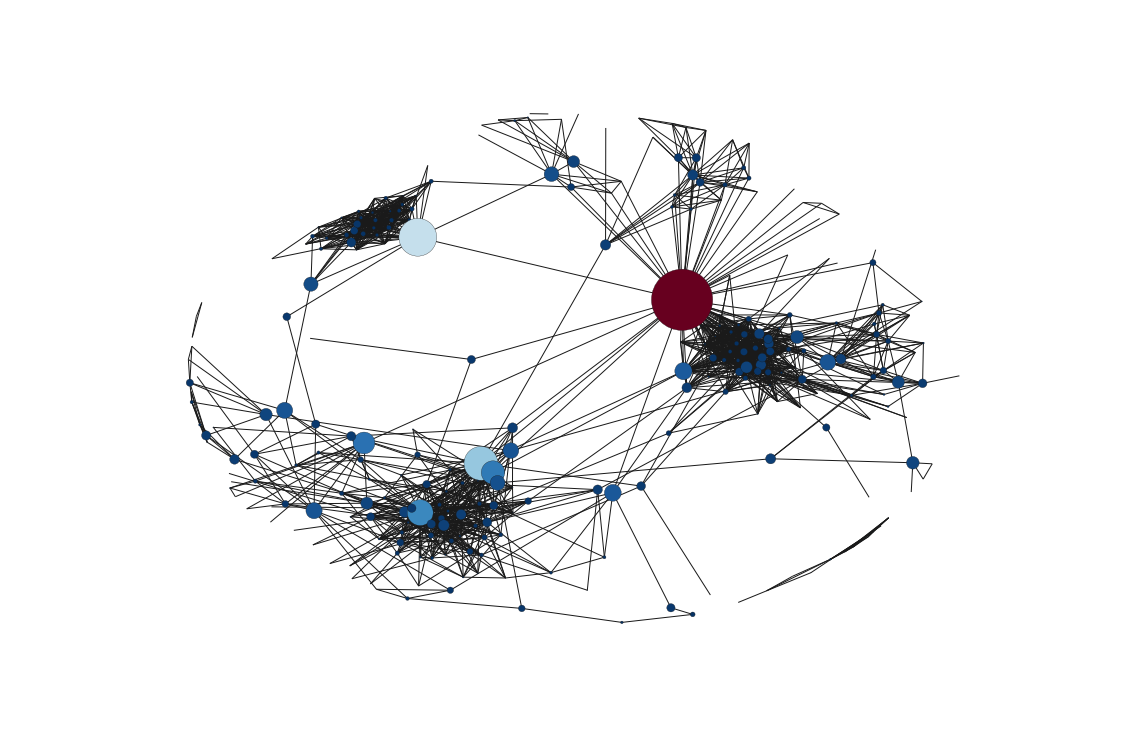

In [27]:
plt.figure(3, figsize=(15,10))
coord = nx.spring_layout(g)
nx.draw(g,
         pos=coord,
         nodelist=betweenness_centrality.keys(),
         node_size = [d*10000 for d in betweenness_centrality.values()],
         node_color=betweenness_centrality.values(),
         font_size=8,
         cmap=plt.cm.get_cmap('RdBu_r'),
         with_labels=False
         )

### Interpretation 

In [30]:
#

### 2.2. Page-Rank

In [33]:
pagerank = networkx.pagerank(g, alpha=0.85)

In [44]:
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
sorted_pagerank[0:5]
# print_info_about(11413041)

[(158530417, 0.021754565093791714),
 (11413041, 0.015766309532918407),
 (4896629, 0.010862956390405697),
 (4784259, 0.009074903562782812),
 (5132511, 0.00852539412653277)]

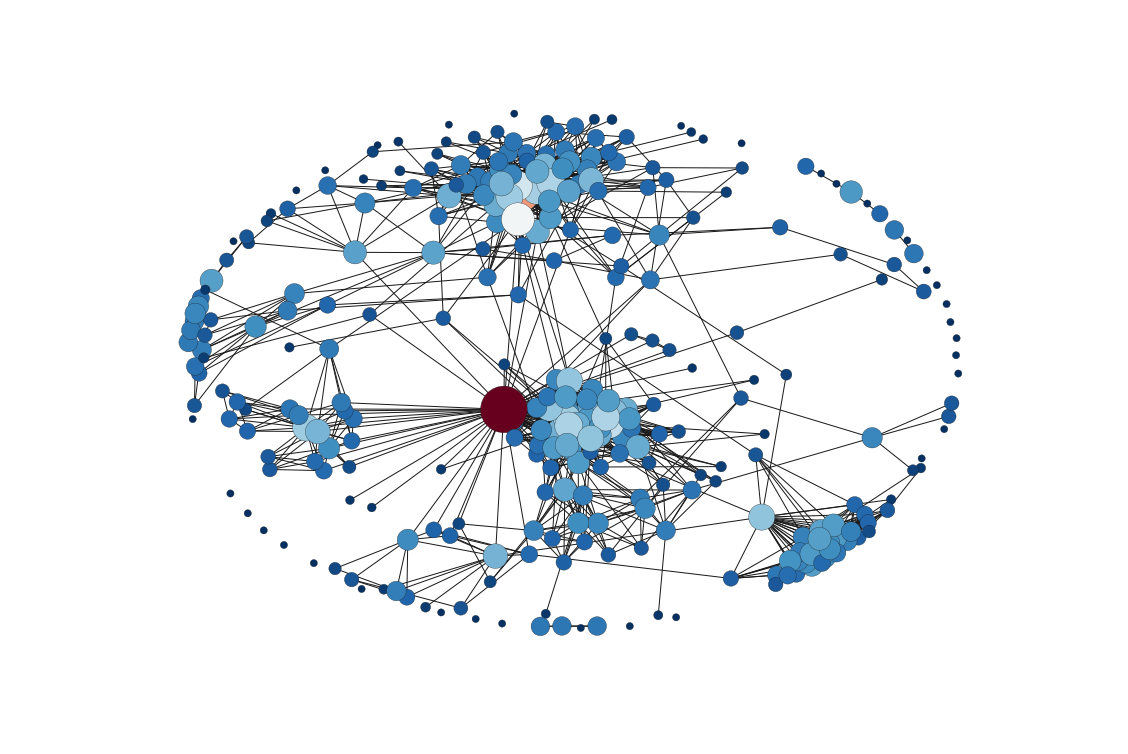

In [36]:
plt.figure(3, figsize=(15,10))
coord = nx.spring_layout(g)
nx.draw(g,
         pos=coord,
         nodelist=pagerank.keys(),
         node_size = [d*100000 for d in pagerank.values()],
         node_color=pagerank.values(),
         font_size=8,
         cmap=plt.cm.get_cmap('RdBu_r'),
         with_labels=False
         )

In [53]:
token = '763bca524278d38f12b55708a6cecbd4946bd9c5aab62a90c1feacbbd194a2e2d8a55ca128bcf8be0d317'

In [68]:
def likecount(ph):
    ownerid = int(ph.split("_")[0])
    idphoto = int(ph.split("_")[1])
    likes = requests.get('https://api.vk.com/method/likes.getList?type=photo&owner_id=%d&item_id=%d' %(ownerid,idphoto)).json()[u'response']
    return(likes[u'count'])

In [69]:
def info_about(id_interest):  
    resp = requests.get('https://api.vk.com/method/users.get?user_ids={}&fields=city, photo_id, schools,\
                        education&lang=en&access_token=763bca524278d38f12b55708a6cecbd4946bd9c5aab62a90c1feacbbd194a2e2d8a55ca128bcf8be0d317'.format(id_interest)).json()[u'response']
    if u'photo_id' in resp[0].keys():
        resp[0][u'popularity'] = likecount(resp[0][u'photo_id'].strip())
    else:
            resp[0][u'popularity'] = 0
    resp[0][u'name'] = resp[0][u'first_name'].strip()+' '+resp[0][u'last_name'].strip()
    if u'schools' in resp[0].keys():
        try:
            resp[0][u'school'] = resp[0][u'schools'][0][u'id']
        except:
            resp[0][u'school'] = 0
    else:
        resp[0][u'school'] = 0
    if u'university' not in resp[0].keys():
        resp[0][u'university'] = 0
    del resp[0][u'first_name']
    del resp[0][u'last_name']
    return(resp[0])

In [70]:
for i in nx.nodes(g):
    print(i)
    I = info_about(i)
    if u'deactivated' in I.keys():
        g.remove_node(i)
    else:
        g.node[i]['name'] = I[u'name']
        g.node[i]['popularity'] = I[u'popularity']
        g.node[i]['school'] = I[u'school']
        g.node[i]['university'] = I[u'university']
        g.node[i]['city'] = I[u'city']
        time.sleep(0.25)
        print(g.node[i]['name']+"is fine")

11284485
Boris Urmanis fine
93405198
Tanya Proskurinais fine
47119
Maxim Duyunovis fine
11507729
Hey Maryis fine
92688407
Polina Ivanovais fine
19157021
Alexey Spasyonovis fine
80332844
Lida Burdonovais fine
128972858
Vladimir Kondratyevis fine
8458300
Ekaterina Ziminais fine
63973448
Yuliana Khlebnikovais fine
962641
Evgeny Solovyovis fine
11085907
Petr Kondratskovis fine
7540822
Vasily Mosinis fine
137801815
Gleb Filatovis fine
3776602
Alexander Shilovis fine
148519036
La Nais fine
4784259
Evgeny Evgenyevichis fine
10104993
Artyom Kokhovis fine
321929387
Lena Sukmanovais fine
8417453
Sergey Ermoshinis fine
155830
Elena Diryuginais fine
3915966
Kirill Strelkovis fine
222054596
Alexey Gorskyis fine
95867080
Sasha Ermolinis fine
92192985
Irina Ivannikovais fine
33507547
Alexander Zhuchkovis fine
5132511
Bogdan Sidorenkois fine
174201057
Panteley Domrais fine
78311651
Alexey Gongalskyis fine
69116136
Daria Sorokinais fine
68391146
Viktor Petruninis fine
9115892
Anton Votinovis fine
15894

In [71]:
networkx.write_gml(g, 'project1.gml')

In [72]:
g = nx.read_gml('project1.gml')

In [77]:
g.nodes(data=True)[0]

(11284485,
 {u'city': 0,
  u'name': u'Boris Urman',
  u'popularity': 93,
  u'school': u'250820',
  u'university': 297})

In [ ]:
sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

In [82]:
g.nodes(data=True)[0][1].items()[0]

(u'university', 297)